In [ ]:
%load_ext autoreload
%autoreload 2

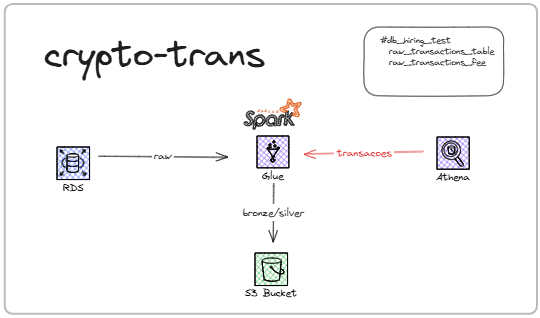



In [53]:
from utils.importer import load_data
import pandas as pd
# from table_evaluator import TableEvaluator, load_data

Fase 1 – Análise sobre as transações:

In [69]:
transactions = load_data('data/raw_transactions.csv')
transactions

,IdTransaction,AdressOrigin,AddressDestination,TolalSend,Status,SentDate,ImportDate
0,ID1002,A-77,A-49,293444.0,Comfirmed,2023-01-08 12:00:00,2023-01-31 12:00:00
1,ID1003,A-24,A-58,542433.0,Comfirmed,2023-01-17 12:00:00,2023-01-31 12:00:00
2,ID1004,A-15,A-20,57223.0,Comfirmed,2023-01-03 12:00:00,2023-01-31 12:00:00
3,ID1005,A-84,A-59,883434.0,Comfirmed,2023-01-02 12:00:00,2023-01-31 12:00:00
4,ID1006,A-86,A-44,194345.0,Comfirmed,2023-01-14 12:00:00,2023-01-31 12:00:00


In [71]:
def get_max_sent_address(table):
    """
    1 - Função para determinar Qual é o endereço (carteira) com maior volume de transações enviadas?
    """
    # Agrupar por endereço de envio e somar os valores
    sent_volume = table.groupby('AdressOrigin')['TolalSend'].sum().reset_index()
    
    # Encontrar o endereço com o maior volume
    max_sent_address = sent_volume.loc[sent_volume['TolalSend'].idxmax()]
    
    return max_sent_address

max_sent_address = get_max_sent_address(transactions)
max_sent_address

AdressOrigin        A-84
TolalSend       883434.0
Name: 3, dtype: object

In [70]:
def get_max_transaction_day(table):
    """
    2- Função para determinar Qual é o dia do mês com maior volume de transações realizadas?
    """
    # Converter a coluna 'Date' para o tipo datetime
    table['SentDate'] = pd.to_datetime(table['SentDate'])
    
    # Extrair o dia do mês e agrupar por ele
    transaction_volume = table.groupby(table['SentDate'].dt.day)['TolalSend'].sum().reset_index()
    
    # Encontrar o dia do mês com o maior volume
    max_transaction_day = transaction_volume.loc[transaction_volume['TolalSend'].idxmax()]
    
    return max_transaction_day
max_transaction_day = get_max_transaction_day(transactions)
max_transaction_day

SentDate          2.0
TolalSend    883434.0
Name: 0, dtype: float64

In [72]:
def get_max_transaction_weekday(table):
    """
    3- Função para determinar Em qual dia da semana geralmente mais transações são realizadas?
    """
    # Converter a coluna 'Date' para o tipo datetime
    table['SentDate'] = pd.to_datetime(table['SentDate'])
    
    # Extrair o dia da semana e agrupar por ele
    transaction_volume = table.groupby(table['SentDate'].dt.day_name())['TolalSend'].sum().reset_index()
    
    # Encontrar o dia da semana com o maior volume
    max_transaction_weekday = transaction_volume.loc[transaction_volume['TolalSend'].idxmax()]
    
    return max_transaction_weekday
max_transaction_weekday = get_max_transaction_weekday(transactions)
max_transaction_weekday


SentDate       Monday
TolalSend    883434.0
Name: 0, dtype: object

In [62]:
def get_anomalous_transactions(table):
    """
    4- Função para determinar Quais transações possuem condições atípicas e precisam ser validadas com o time responsável pela disponibilização dos dados?
    """
    # Definindo um limite para considerar uma transação como anômala
    threshold = table['TolalSend'].mean() + 3 * table['TolalSend'].std()
    
    # Filtrando as transações que excedem o limite
    anomalous_transactions = table[table['TolalSend'] > threshold]
    
    return anomalous_transactions
anomalous_transactions = get_anomalous_transactions(table)
anomalous_transactions


,IdTransaction,AdressOrigin,AddressDestination,TolalSend,Status,SentDate,ImportDate


In [73]:
def get_max_balance_address(table):
    """
    5- Função para determinar Qual a carteira com o maior saldo final? 
    (considere que todas as carteiras estejam zeradas no início das análises e que seja possível existir saldo negativo).
    """
    # Agrupar por endereço e calcular o saldo final
    balance = table.groupby('AdressOrigin')['TolalSend'].sum().reset_index()
    
    # Encontrar o endereço com o maior saldo
    max_balance_address = balance.loc[balance['TolalSend'].idxmax()]
    
    return max_balance_address
max_balance_address = get_max_balance_address(transactions)
max_balance_address


AdressOrigin        A-84
TolalSend       883434.0
Name: 3, dtype: object

raw_transactions_table

In [96]:
fee = load_data('data/raw_transactions_fee.csv')
fee

,range-start,range-end,fee-percentage
0,0.01,160000.0,10.0
1,160000.01,340000.0,8.0
2,340000.01,500000.0,6.0


In [101]:

def get_max_fee_address(table, fee_table):
    """
    6- Função para determinar Qual é o endereço (carteira) que pagou a maior taxa de envio em janeiro de 2023?
    """
    # Filtrar as transações de janeiro de 2023
    table['SentDate'] = pd.to_datetime(table['SentDate'])
    january_transactions = table[(table['SentDate'].dt.month == 1) & (table['SentDate'].dt.year == 2023)]
    
    # Merge com a tabela de taxas
    merged = pd.merge(january_transactions, fee_table, how='left', left_on='TolalSend', right_on='range-start')
    
    # return merged
    # # Calcular a taxa paga
    merged['FeePaid'] = merged['TolalSend'] * merged['fee-percentage']
    
    # # Agrupar por endereço e somar as taxas pagas
    fee_volume = merged.groupby('AdressOrigin')['FeePaid'].sum().reset_index()
    
    # # Encontrar o endereço com o maior pagamento de taxa
    max_fee_address = fee_volume.loc[fee_volume['FeePaid'].idxmax()]
    
    return max_fee_address
max_fee_address = get_max_fee_address(transactions, fee)
max_fee_address



AdressOrigin    A-15
FeePaid          0.0
Name: 0, dtype: object